# Pset1 5

In [1]:
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import quasars as q
import fisher_scoring as fs

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [7]:
x = np.asarray([[2,3],[4,5]])
x

array([[2, 3],
       [4, 5]])

In [12]:
np.zeros((x.shape[0], 1))

array([[ 0.],
       [ 0.]])

In [14]:
np.insert(x, [0], np.zeros((x.shape[0], 1)), axis=1)

array([[0, 2, 3],
       [0, 4, 5]])

In [3]:
raw_train, raw_test, wavelengths = q.load_data()

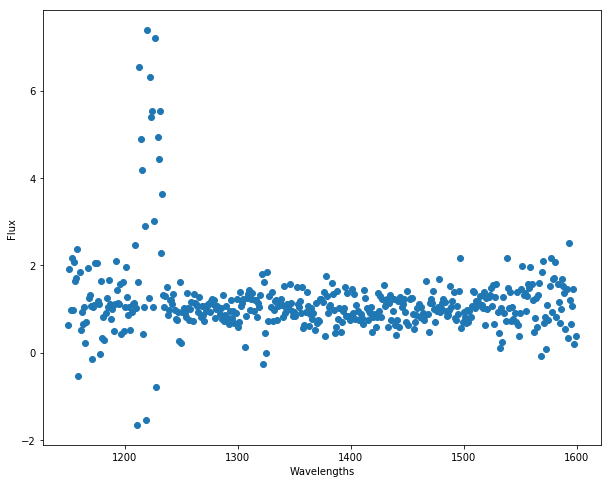

In [4]:
plt.ylabel('Flux')
plt.xlabel('Wavelengths')

plt.scatter(wavelengths, raw_train[0])
plt.show()

In [101]:
print(wavelengths.shape)
print(raw_train.shape)

(450,)
(200, 450)


In [45]:
raw_train[0]

array([ 0.629,  1.91 ,  0.976,  2.161,  0.964,  2.068,  1.63 ,  1.716,
        2.378, -0.54 ,  1.833,  0.525,  0.927,  0.652,  1.049,  0.218,
        0.706,  1.936,  1.242,  1.307,  1.07 , -0.141,  1.032,  1.099,
        2.043,  2.046,  1.187,  1.118, -0.043,  1.627,  0.329,  0.808,
        0.292,  0.896,  1.26 ,  1.047,  1.651,  1.107,  0.763,  1.002,
        0.492,  1.108,  2.098,  1.428,  1.128,  1.103,  1.57 ,  0.42 ,
        1.604,  0.485,  1.05 ,  1.951,  1.267,  0.869,  1.045,  0.527,
        0.931,  1.12 ,  1.124,  2.467,  1.029, -1.655,  1.623,  6.531,
        4.883,  4.175,  0.424,  1.046,  2.897, -1.534,  7.388,  1.244,
        6.3  ,  5.383,  5.522,  1.049,  3.012,  7.199, -0.792,  4.945,
        4.438,  5.539,  2.281,  3.625,  1.311,  1.034,  1.302,  1.49 ,
        0.849,  0.98 ,  1.197,  1.208,  1.12 ,  1.345,  0.964,  0.773,
        0.739,  0.934,  0.258,  1.622,  0.215,  0.92 ,  1.031,  0.91 ,
        0.818,  1.358,  1.012,  0.743,  0.997,  1.15 ,  0.716,  1.333,
      

In [62]:
X_ = raw_train[0].reshape((raw_train[0].shape[0],1))
X = np.insert(X_, [0], np.zeros((X_.shape[0], 1)), axis=1)

Part b.i) Theta=[2.5134, -0.0010]


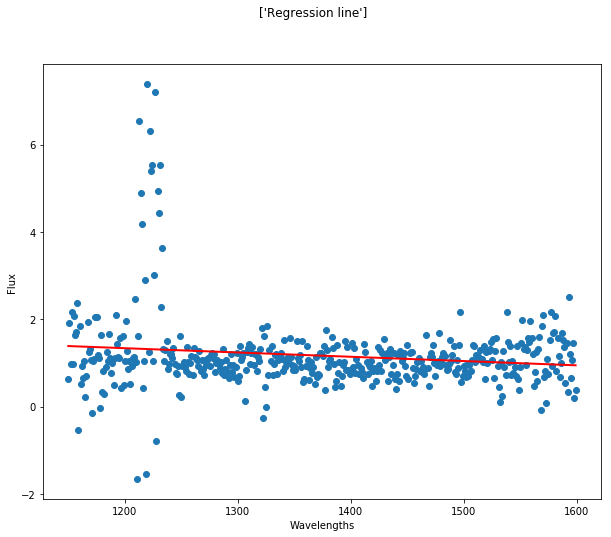

In [95]:
## Part b.i
lr_est, theta = q.LR_smooth(raw_train[0], wavelengths.reshape((wavelengths.shape[0],1)))
print('Part b.i) Theta=[%.4f, %.4f]' % (theta[0], theta[1]))
q.plot_b(wavelengths, raw_train[0], lr_est, ['Regression line'], 'ps1q5b1.png')

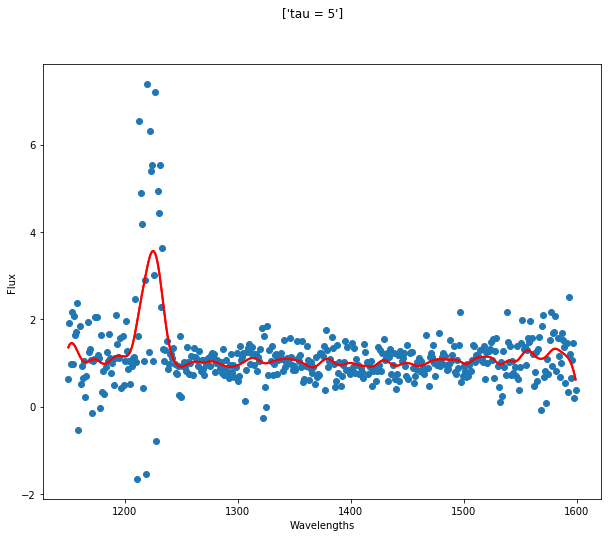

In [9]:
## Part b.ii
lwr_est_5 = q.LWR_smooth(raw_train[0], wavelengths.reshape((wavelengths.shape[0],1)), 5)
q.plot_b(wavelengths, raw_train[0], lwr_est_5, ['tau = 5'], 'ps1q5b2.png')

In [10]:
### Part b.iii
X = wavelengths.reshape((wavelengths.shape[0],1))
Y = raw_train[0]
lwr_est_1 = q.LWR_smooth(Y, X, 1)
lwr_est_10 = q.LWR_smooth(Y, X, 10)
lwr_est_100 = q.LWR_smooth(Y, X, 100)
lwr_est_1000 = q.LWR_smooth(Y, X, 1000)

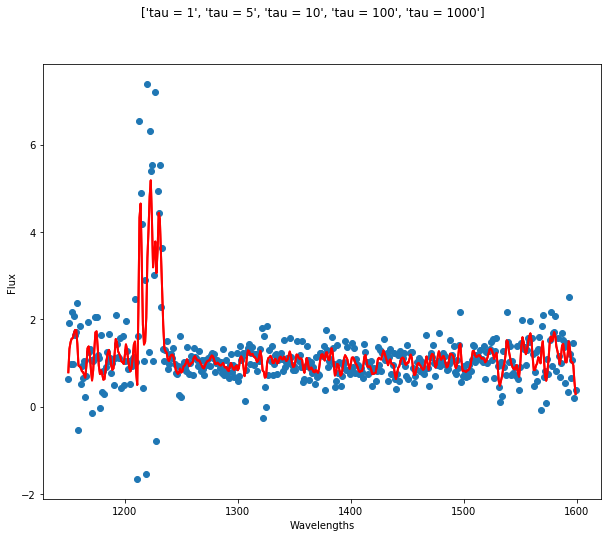

In [18]:
q.plot_b(X, Y, lwr_est_1,
         ['tau = 1', 'tau = 5', 'tau = 10', 'tau = 100', 'tau = 1000'],
         'ps1q5b3.png')

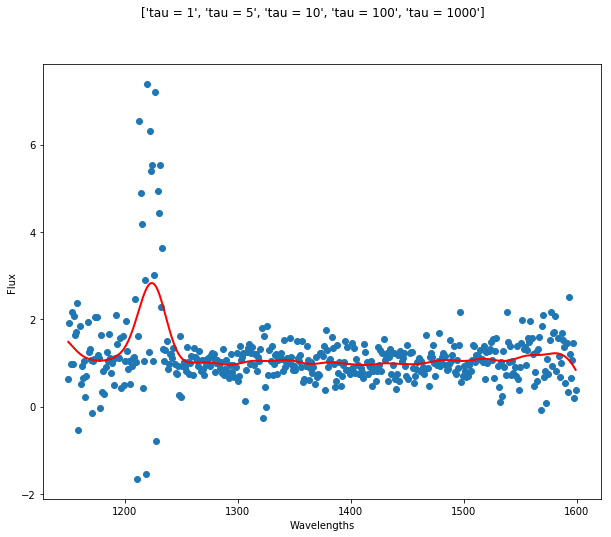

In [142]:
q.plot_b(X, Y, lwr_est_10,
         ['tau = 1', 'tau = 5', 'tau = 10', 'tau = 100', 'tau = 1000'],
         'ps1q5b3.png')

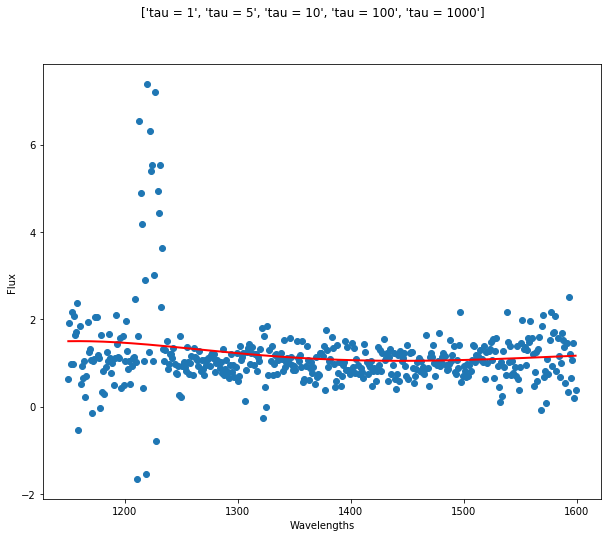

In [143]:
q.plot_b(X, Y, lwr_est_100,
         ['tau = 1', 'tau = 5', 'tau = 10', 'tau = 100', 'tau = 1000'],
         'ps1q5b3.png')

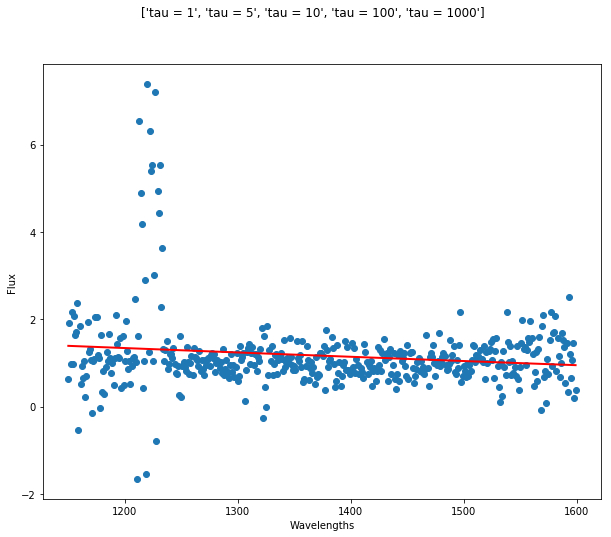

In [144]:
q.plot_b(X, Y, lwr_est_1000,
         ['tau = 1', 'tau = 5', 'tau = 10', 'tau = 100', 'tau = 1000'],
         'ps1q5b3.png')

As tau increases, the curve becomes smoother, all the way down to a flat line with tau=1000. As tau decreases, the line becomes less smooth and more noisy.

In [21]:
### Part c.i
X = wavelengths.reshape((wavelengths.shape[0],1))
print(X.shape)
print(raw_train.shape)
smooth_train, smooth_test = [q.smooth_data(raw, X, 5) for raw in [raw_train, raw_test]]

(450, 1)
(200, 450)


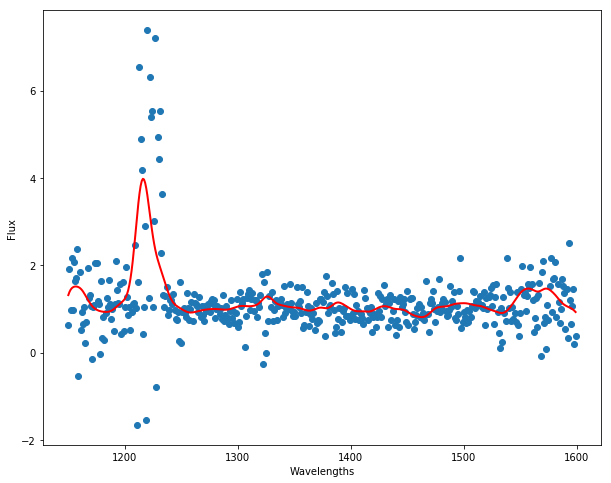

In [26]:
q.plot_b(X, Y, smooth_test[10],'', 'all.png')

In [37]:
wavelengths[150]

1300.0

In [ ]:
#### Part c.ii
left_train, right_train = q.split(smooth_train, wavelengths)
left_test, right_test = q.split(smooth_test, wavelengths)

train_errors = [dist(left, q.func_reg(left_train, right_train, right)) for left, right in zip(left_train, right_train)]
print('Part c.ii) Training error: %.4f' % np.mean(train_errors))

In [ ]:
### Part c.iii
test_errors = [q.dist(left, q.func_reg(left_train, right_train, right)) for left, right in zip(left_test, right_test)]
print('Part c.iii) Test error: %.4f' % np.mean(test_errors))

left_1 = q.func_reg(left_train, right_train, right_test[0])
q.plot_c(left_1, smooth_test[0], wavelengths, 'ps1q5c3_1.png')
left_6 = q.func_reg(left_train, right_train, right_test[5])
q.plot_c(left_6, smooth_test[5], wavelengths, 'ps1q5c3_6.png')